# Feature Engineering

The objective of this Python notebook is to perform feature engineering to extract more fine-grained information for subsequent analyses. We will ensure that variables in the dataset are of the correct data types. The feature engineering pipeline is as shown:
<div>
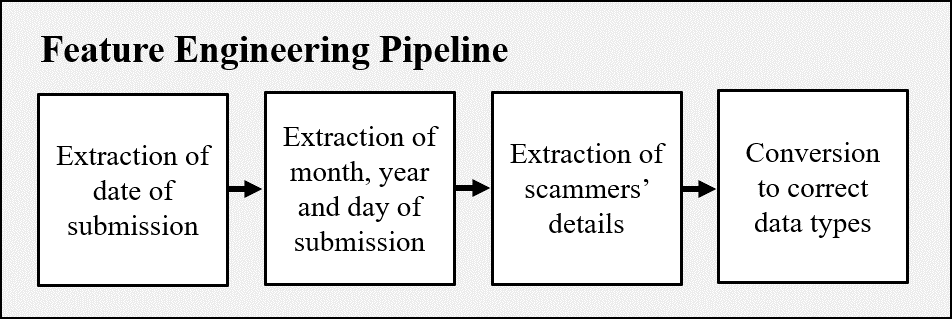
</div>

## Import the necessary libraries

In [26]:
import pandas as pd
from datetime import datetime, date
import calendar
from collections import Counter
import spacy
import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [27]:
nlp = spacy.load("en_core_web_sm")

## Define functions

In [30]:
def to_csv(df, path):
    
    """This function saves a Pandas dataframe at a specified filepath, while preserving the data types of each variable.
    Source: https://stackoverflow.com/questions/50047237/how-to-preserve-dtypes-of-dataframes-when-using-to-csv/50051542#50051542"""
    
    # Prepend dtypes to the top of df
    df2 = df.copy()
    df2.loc[-1] = df2.dtypes
    df2.index = df2.index + 1
    df2.sort_index(inplace=True)
    
    # Then save it to a csv
    df2.to_csv(path, index=False)
    
    return True

## Load the dataset

In [31]:
# Load dataset, with submission ID as the index
scam_df = pd.read_csv("Data/scam_data_2.csv").set_index('submission_id').drop(columns="Unnamed: 0")

# Check first five rows...
scam_df.head()

,date,informant,incident_description,scammer_details,scam_type
submission_id,,,,,
20200717-fBLC6F,2020-07-17,Anonymous,\r\n They call me by whatsapp ...,\r\n Name: I only know ...,Impersonation Scam
20200717-yOxIAl,2020-07-17,Anonymous,\r\n it happened this morning 0...,\r\n Name: Ministry of ...,Phishing Scam
20200717-Tz5TyW,2020-07-17,Anonymous,\r\n I rceived a call from a la...,\r\n Name: SIngtel\r\n ...,Phishing Scam
20200716-O79B6r,2020-07-16,Anonymous,\r\n details: I received a call...,\r\n Name: Singapore hi...,Impersonation Scam
20200716-yIa3LH,2020-07-16,Anonymous,\n1) An impersonated junior technical staff ca...,"\r\n Name: SINGTEL, RON...",Phishing Scam


In [32]:
# # Load dataset, with submission ID as the index
# scam_df = pd.read_csv("Data/scam_data_3_v1.csv").set_index('submission_id').drop(columns="Unnamed: 0")

# # Check first five rows...
# scam_df.head()

## Extraction of date, day, month, week and year of submission

In [33]:
# Extract date number
scam_df['date_num'] = scam_df.apply(lambda x: datetime.strptime(x['date'], "%Y-%m-%d").day, axis=1)

# Extract month
scam_df['month'] = scam_df.apply(lambda x: calendar.month_name[datetime.strptime(x['date'], "%Y-%m-%d").month], axis=1)

# Extract year
scam_df['year'] = scam_df.apply(lambda x: datetime.strptime(x['date'], "%Y-%m-%d").year, axis=1)

# Extract day of the week
scam_df['day'] = scam_df.apply(lambda x: calendar.day_name[datetime.strptime(x['date'], "%Y-%m-%d").weekday()], axis=1)

# Convert date to datetime object
scam_df['date'] = scam_df.apply(lambda x: datetime.strptime(x['date'], "%Y-%m-%d"), axis=1)

# Extract week number of the year
scam_df['week_num'] = scam_df.apply(lambda x: datetime.date(x['date']).isocalendar()[1], axis=1)

# Create a column to store month-year
scam_df['monthyear'] = scam_df['date'].dt.strftime('%b %Y')

# Rearrange columns
scam_df = scam_df[['date', 'year', 'month', 'date_num', 'day', 'week_num', 'monthyear', 'informant', 'incident_description', 'scammer_details', 'scam_type']]

# Sanity check
scam_df.head()

,date,year,month,date_num,day,week_num,monthyear,informant,incident_description,scammer_details,scam_type
submission_id,,,,,,,,,,,
20200717-fBLC6F,2020-07-17,2020,July,17,Friday,29,Jul 2020,Anonymous,\r\n They call me by whatsapp ...,\r\n Name: I only know ...,Impersonation Scam
20200717-yOxIAl,2020-07-17,2020,July,17,Friday,29,Jul 2020,Anonymous,\r\n it happened this morning 0...,\r\n Name: Ministry of ...,Phishing Scam
20200717-Tz5TyW,2020-07-17,2020,July,17,Friday,29,Jul 2020,Anonymous,\r\n I rceived a call from a la...,\r\n Name: SIngtel\r\n ...,Phishing Scam
20200716-O79B6r,2020-07-16,2020,July,16,Thursday,29,Jul 2020,Anonymous,\r\n details: I received a call...,\r\n Name: Singapore hi...,Impersonation Scam
20200716-yIa3LH,2020-07-16,2020,July,16,Thursday,29,Jul 2020,Anonymous,\n1) An impersonated junior technical staff ca...,"\r\n Name: SINGTEL, RON...",Phishing Scam


## Extraction of scammers' details

In [34]:
# Initialise new columns to store scammer name and contact
scam_df = scam_df.assign(scammer_name="")
scam_df = scam_df.assign(scammer_contact="")

# Loop through the dataset to extract scammer name and contract from the scammer_details column
for idx, row in scam_df.iterrows():
    split_string = row['scammer_details'].strip().replace('\r\n', '').split('Name: ')[1].split('Contact:')
    scam_df.loc[idx, 'scammer_name'] = split_string[0].strip()
    scam_df.loc[idx, 'scammer_contact'] = split_string[-1].strip()
    
# Delete the original column
scam_df = scam_df.drop(columns=['scammer_details'])

# Sanity check
scam_df.head()

,date,year,month,date_num,day,week_num,monthyear,informant,incident_description,scam_type,scammer_name,scammer_contact
submission_id,,,,,,,,,,,,
20200717-fBLC6F,2020-07-17,2020,July,17,Friday,29,Jul 2020,Anonymous,\r\n They call me by whatsapp ...,Impersonation Scam,I only know the number,923329855137
20200717-yOxIAl,2020-07-17,2020,July,17,Friday,29,Jul 2020,Anonymous,\r\n it happened this morning 0...,Phishing Scam,Ministry of law,6566309459
20200717-Tz5TyW,2020-07-17,2020,July,17,Friday,29,Jul 2020,Anonymous,\r\n I rceived a call from a la...,Phishing Scam,SIngtel,
20200716-O79B6r,2020-07-16,2020,July,16,Thursday,29,Jul 2020,Anonymous,\r\n details: I received a call...,Impersonation Scam,Singapore high or supreme court,
20200716-yIa3LH,2020-07-16,2020,July,16,Thursday,29,Jul 2020,Anonymous,\n1) An impersonated junior technical staff ca...,Phishing Scam,"SINGTEL, RON WATSON from CYBER secury defence ...",40142219


## Conversion to correct data types

First, let's check the data types of each variable.

In [35]:
scam_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4554 entries, 20200717-fBLC6F to 20160720-waN3UH
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  4554 non-null   datetime64[ns]
 1   year                  4554 non-null   int64         
 2   month                 4554 non-null   object        
 3   date_num              4554 non-null   int64         
 4   day                   4554 non-null   object        
 5   week_num              4554 non-null   int64         
 6   monthyear             4554 non-null   object        
 7   informant             4554 non-null   object        
 8   incident_description  4554 non-null   object        
 9   scam_type             4554 non-null   object        
 10  scammer_name          4554 non-null   object        
 11  scammer_contact       4554 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 

We need to convert data types for the following variables:
- Convert `month` and `day` to categorical data types;
- Convert `scam_type` to categorical data type;
- Convert `monthyear` to datetime object

### Convert month to categorical data type

In [36]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
scam_df['month'] = scam_df['month'].astype('category') 
scam_df['month'].cat.set_categories(new_categories=month_order, ordered=True, inplace=True)

### Convert day to categorical data type

In [37]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'] 
scam_df['day'] = scam_df['day'].astype('category') 
scam_df['day'].cat.set_categories(new_categories=day_order, ordered=True, inplace=True)

### Convert scam type to categorical data type

In [38]:
scam_type_order = list(scam_df['scam_type'].unique())
scam_df['scam_type'] = scam_df['scam_type'].astype('category') 
scam_df['scam_type'].cat.set_categories(new_categories=scam_type_order, ordered=True, inplace=True)

### Convert month-year to datetime object

In [39]:
scam_df.monthyear = pd.to_datetime(scam_df.monthyear)

## Sanity Checks

In [40]:
scam_df = scam_df.reset_index()
scam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4554 entries, 0 to 4553
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   submission_id         4554 non-null   object        
 1   date                  4554 non-null   datetime64[ns]
 2   year                  4554 non-null   int64         
 3   month                 4554 non-null   category      
 4   date_num              4554 non-null   int64         
 5   day                   4554 non-null   category      
 6   week_num              4554 non-null   int64         
 7   monthyear             4554 non-null   datetime64[ns]
 8   informant             4554 non-null   object        
 9   incident_description  4554 non-null   object        
 10  scam_type             4554 non-null   category      
 11  scammer_name          4554 non-null   object        
 12  scammer_contact       4554 non-null   object        
dtypes: category(3), da

## Save as a CSV file

In [42]:
# Rearrange columns
scam_df = scam_df[['submission_id', 'date', 'year', 'month', 'date_num', 'day', 
                   'week_num', 'monthyear', 'informant', 'incident_description', 'scammer_name',
                   'scammer_contact', 'scam_type']]
scam_df.head()

,submission_id,date,year,month,date_num,day,week_num,monthyear,informant,incident_description,scammer_name,scammer_contact,scam_type
0,20200717-fBLC6F,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n They call me by whatsapp ...,I only know the number,923329855137,Impersonation Scam
1,20200717-yOxIAl,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n it happened this morning 0...,Ministry of law,6566309459,Phishing Scam
2,20200717-Tz5TyW,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n I rceived a call from a la...,SIngtel,,Phishing Scam
3,20200716-O79B6r,2020-07-16,2020,July,16,Thursday,29,2020-07-01,Anonymous,\r\n details: I received a call...,Singapore high or supreme court,,Impersonation Scam
4,20200716-yIa3LH,2020-07-16,2020,July,16,Thursday,29,2020-07-01,Anonymous,\n1) An impersonated junior technical staff ca...,"SINGTEL, RON WATSON from CYBER secury defence ...",40142219,Phishing Scam


In [44]:
to_csv(scam_df, "Data/scam_data_3.csv") 

True